
## Sentiment Analysis
 




The following is a completed assignment from my Masters of Data Science program. This Python project focuses on two commencement speeches and using a sentiment analysis to score how subjective and polarizing the speeches are. It focuses on using a multitude of libraries including pandas, seaborn, matplotlib, and plotly for data analysis and graphing, as well as textblob, newspaper and beautifulsoup for sentiment analysis.

### Objectives:
* Retrieve text data from an article, speech, story, debate or some other web-based source.
* Clean the data and perform sentiment analysis.


# Data Source 1


In [1]:
import requests        
from bs4 import BeautifulSoup      
from textblob import TextBlob      
from newspaper import Article

from pathlib import Path    

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

from newspaper import Article

# Magics
%matplotlib inline


%config InlineBackend.figure_format = 'retina'

In [2]:
url = 'https://news.stanford.edu/news/2005/june15/jobs-061505.html'  #Steve Jobs Commencement Speech

response = requests.get(url)
response.encoding = 'utf-8'

In [3]:
url = 'https://news.stanford.edu/news/2005/june15/jobs-061505.html'
event = '-JOBS_STANFORD_05'   

In [4]:
article = Article(url)
article.download()
article.parse()
text = article.text   

In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
blob = TextBlob(article.text)

In [7]:
blob.sentiment

Sentiment(polarity=0.185597510822511, subjectivity=0.4939680735930736)

In [8]:
pd.set_option('max_colwidth', 400)    

p = []
s = []
txt = []
for sentence in blob.sentences:
    p.append(sentence.sentiment.polarity)
    s.append(sentence.sentiment.subjectivity)
    txt.append(str(sentence))

df_sent = pd.DataFrame(p,columns=['polarity'])
df_sent['subjectivity'] = s
df_sent['text'] = txt

df_sent.sort_values('polarity', ascending=True, inplace = True) 


df_sent

,polarity,subjectivity,text
80,-1.000000,1.000000,"It was awful tasting medicine, but I guess the patient needed it."
66,-0.700000,0.666667,I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly.
45,-0.666667,1.000000,Of course it was impossible to connect the dots looking forward when I was in college.
130,-0.300000,0.300000,Everything else is secondary.
22,-0.300000,0.600000,"But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition."
...,...,...,...
34,0.850000,1.000000,"Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed."
33,1.000000,0.300000,Let me give you one example:\n\nReed College at that time offered perhaps the best calligraphy instruction in the country.
72,1.000000,0.300000,"I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me."
78,1.000000,1.000000,And Laurene and I have a wonderful family together.


In [9]:
df_sent.corr() #correlation between polarity and subjectivity

,polarity,subjectivity
polarity,1.000000,0.353125
subjectivity,0.353125,1.000000


# Data Source 2

**Using Mark Zuckerberg's Harvard Commencement speeech from 2017**


In [10]:
url2 = 'https://www.cnbc.com/2017/05/26/full-text-of-mark-zuckerbergs-2017-harvard-commencement-speech.html'  #Mark Zuckerberg Commencement Speech

response = requests.get(url2)   
response.encoding = 'utf-8'

In [11]:
article2 = Article(url2) 


article2.download()    
article2.parse()     


text2 = article2.text 

In [12]:
url = 'https://www.cnbc.com/2017/05/26/full-text-of-mark-zuckerbergs-2017-harvard-commencement-speech.html'
event = '-ZUCKERBERG_HARVARD_17'  

In [14]:
blob2 = TextBlob(article2.text)

In [15]:
blob2.sentiment

Sentiment(polarity=0.13515047235750355, subjectivity=0.4981319895382396)

In [16]:
pd.set_option('max_colwidth', 400)    

p = []
s = []
txt = []
for sentence in blob2.sentences:
    p.append(sentence.sentiment.polarity)
    s.append(sentence.sentiment.subjectivity)
    txt.append(str(sentence))

df_sent2 = pd.DataFrame(p,columns=['polarity'])
df_sent2['subjectivity'] = s
df_sent2['text'] = txt

df_sent2.sort_values('polarity', ascending=True, inplace = True) 


df_sent2

,polarity,subjectivity,text
87,-0.500000,0.90,"I wondered if I was just wrong, an impostor, a 22-year-old kid who had no idea how the world worked."
107,-0.500000,0.90,Movies and pop culture get this all wrong.
12,-0.500000,1.00,That could have been a really sad video.
111,-0.500000,0.90,"Oh, you know what else movies get wrong about innovation?"
117,-0.483333,0.70,"Anyone working on a complex problem will get blamed for not fully understanding the challenge, even though it's impossible to know everything upfront."
...,...,...,...
2,0.716667,0.85,"Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world..."
48,0.800000,1.00,You're graduating at a time when this is especially important.
100,0.800000,0.75,Now it's our turn to do great things.
15,0.900000,0.90,Mine was Computer Science 121 with the incredible Harry Lewis.


In [17]:
df_sent2.corr() #correlation between polarity and subjectivity

,polarity,subjectivity
polarity,1.000000,0.266139
subjectivity,0.266139,1.000000


In [18]:
## add column 'dataframe' for df_sent and df_sent2 to distinguish where each line of text came from

df_sent['dataframe'] = str('df_sent')
df_sent

,polarity,subjectivity,text,dataframe
80,-1.000000,1.000000,"It was awful tasting medicine, but I guess the patient needed it.",df_sent
66,-0.700000,0.666667,I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly.,df_sent
45,-0.666667,1.000000,Of course it was impossible to connect the dots looking forward when I was in college.,df_sent
130,-0.300000,0.300000,Everything else is secondary.,df_sent
22,-0.300000,0.600000,"But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition.",df_sent
...,...,...,...,...
34,0.850000,1.000000,"Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed.",df_sent
33,1.000000,0.300000,Let me give you one example:\n\nReed College at that time offered perhaps the best calligraphy instruction in the country.,df_sent
72,1.000000,0.300000,"I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me.",df_sent
78,1.000000,1.000000,And Laurene and I have a wonderful family together.,df_sent


In [19]:
df_sent2['dataframe'] = str('df_sent2')
df_sent2

,polarity,subjectivity,text,dataframe
87,-0.500000,0.90,"I wondered if I was just wrong, an impostor, a 22-year-old kid who had no idea how the world worked.",df_sent2
107,-0.500000,0.90,Movies and pop culture get this all wrong.,df_sent2
12,-0.500000,1.00,That could have been a really sad video.,df_sent2
111,-0.500000,0.90,"Oh, you know what else movies get wrong about innovation?",df_sent2
117,-0.483333,0.70,"Anyone working on a complex problem will get blamed for not fully understanding the challenge, even though it's impossible to know everything upfront.",df_sent2
...,...,...,...,...
2,0.716667,0.85,"Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world...",df_sent2
48,0.800000,1.00,You're graduating at a time when this is especially important.,df_sent2
100,0.800000,0.75,Now it's our turn to do great things.,df_sent2
15,0.900000,0.90,Mine was Computer Science 121 with the incredible Harry Lewis.,df_sent2


# Combined Dataframe 

In [20]:
df3 = df_sent.merge(df_sent2, how = 'outer')
df3.sort_values(by=['subjectivity'], ascending= False)  #sorting to make sure all data was included in the merge. it was

,polarity,subjectivity,text,dataframe
0,-1.00,1.0,"It was awful tasting medicine, but I guess the patient needed it.",df_sent
275,0.60,1.0,"And that, Class of 2017, is why you should be nice to people.",df_sent2
143,0.85,1.0,"Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed.",df_sent
146,1.00,1.0,And Laurene and I have a wonderful family together.,df_sent
72,0.00,1.0,"Again, you can't connect the dots looking forward; you can only connect them looking backward.",df_sent
...,...,...,...,...
191,0.00,0.0,We can fix this.,df_sent2
190,0.00,0.0,"How about modernizing democracy so everyone can vote online, and personalizing education so everyone can learn?",df_sent2
189,0.00,0.0,These achievements are within our reach.,df_sent2
188,0.00,0.0,Let's do them all in a way that gives everyone in our society a role.,df_sent2


# Scatter plot with two plots, one for each source


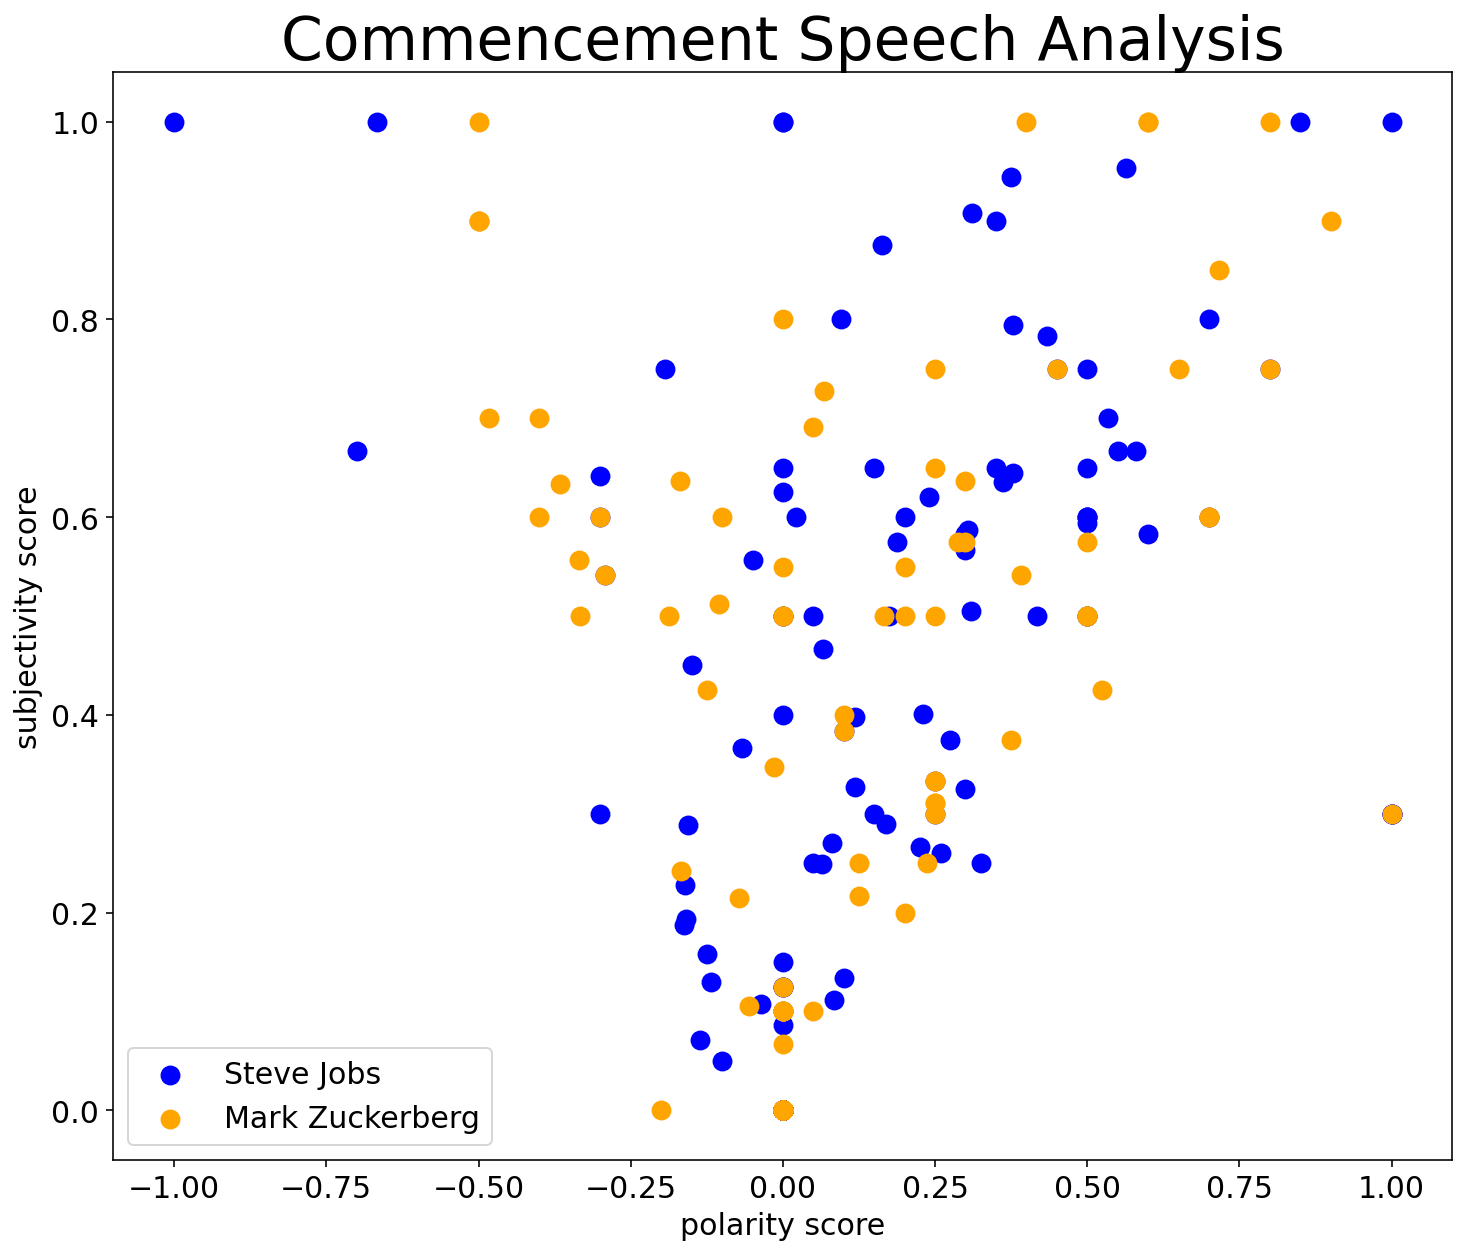

In [21]:
fig, ax = plt.subplots(figsize = (12, 10))
plt.xticks (fontsize= 15 ) 
plt.yticks (fontsize= 15 )

x1 = df_sent['polarity'].tolist()
y1 = df_sent['subjectivity'].tolist()
x2 = df_sent2['polarity'].tolist()
y2 = df_sent2['subjectivity'].tolist()

plt.scatter(x1, y1, s=80, color = 'b', label = 'Steve Jobs')
plt.scatter(x2, y2, s=80, color = 'orange', label = 'Mark Zuckerberg')

plt.title('Commencement Speech Analysis',fontsize=30)

plt.ylabel('subjectivity score', fontsize=15)
plt.xlabel('polarity score', fontsize=15)

plt.legend(loc='lower left', fontsize = 15)

# Key statistics for analysis

In [22]:
blob.sentiment  #Steve Jobs sentiment score

Sentiment(polarity=0.185597510822511, subjectivity=0.4939680735930736)

In [23]:
blob2.sentiment  #Mark Zuckerburg sentiment score

Sentiment(polarity=0.13515047235750355, subjectivity=0.4981319895382396)

In [24]:
# Steve Jobs desccriptive stats 

df_sent.describe()  

,polarity,subjectivity
count,148.000000,148.000000
mean,0.126485,0.328545
std,0.298407,0.319070
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.289444
75%,0.300000,0.600000
max,1.000000,1.000000


In [25]:
# Mark Zuckerberg descriptive stats

df_sent2.describe()

,polarity,subjectivity
count,136.000000,136.000000
mean,0.077302,0.287625
std,0.277381,0.318695
min,-0.500000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.115278
75%,0.200000,0.543750
max,1.000000,1.000000


In [26]:
# Combined descriptive statistics

df3.describe()

,polarity,subjectivity
count,284.000000,284.000000
mean,0.102933,0.308950
std,0.289072,0.318985
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.250000
75%,0.250000,0.577083
max,1.000000,1.000000


In [27]:
# Combined Correlation score

df3.corr()

,polarity,subjectivity
polarity,1.000000,0.316577
subjectivity,0.316577,1.000000


# My Analysis

   Steve Jobs gave one of the most recognized commencement speeches before the Stanford graduation class of 2005, just 6 years before his death. Mark Zuckerberg, the founder of Facebook, also gave a commendable speech before Harvard's graduating class of 2017. For this assignment, I decided to run an analysis of the two speeches to interpret how each speech could be received by an audience. For this project, I analyzed two pieces of data, polarity in the speech, and subjectivity. Each was measured on a scale of -1 to 1. 
    
   Polarity: -1 being very negative sounding and 1 being very positive souding
   Subjectivity: 0 being very objective (fact-based) and 1 being very subjective (opinionated)
    
    
   My analysis is as follows:
    
   The sentiment score for Steve Jobs speech show that there was a polarity score of .1856 and a subjectivity of .4939. This can be interpreted as Jobs' speech not being too positive or negative, and also that the content of his speech hovers right in the middle between fact-based and opinionated. 
    
   Zuckerburg scored relatively the same in subjectivity at .4981 and polarity at .1351. This suggests to me that Zuckerburg also tried to keep his speech relatively balanced in tone and content but had a slightly more negative approach to his wording. 
    
   Finally, I combined the two speeches into one analysis to see if I could interpret my findings any differently with more of a sample size. In this case, I looked at the descriptive statistics and interpreted the mean of both variables. With only 284 sentence lines between the two speeches, it didn't change much. Mean polarity was .1029 (a relatively neutral and balanced tone) and subjectivity was .3090 (slightly lower than the sentiment scores but still suggesting the conent was balanced.) 
    
   My takeaway is that these speeches are recognized as some of the best for a reason. They suggest that a balanced tone between positive and negative content along with fact-based statements is a recipe for a good speech. It says that having some uplifting, positive content is just as important as having some somber content. If I could add to this analysis and continue interpreting the lines of each speech, I would want to interpret a metric that captures attention (something like a scale of -1 being very boring and 1 being very attentive.) I think this would help speech writers significantly going forward. 
